import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
admission_df = pd.read_csv('Admission_Predict.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df["GT"]=admission_df["GRE Score"]+admission_df["TOEFL Score"]
admission_df["USLC"]=admission_df["University Rating"]+admission_df["SOP"]+admission_df["LOR "]+admission_df["CGPA"]

In [5]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GT,USLC
0,1,337,118,4,4.5,4.5,9.65,1,0.92,455,22.65
1,2,324,107,4,4.0,4.5,8.87,1,0.76,431,21.37
2,3,316,104,3,3.0,3.5,8.00,1,0.72,420,17.50
3,4,322,110,3,3.5,2.5,8.67,1,0.80,432,17.67
4,5,314,103,2,2.0,3.0,8.21,0,0.65,417,15.21


In [6]:
admission_df.drop('Serial No.', axis=1, inplace=True)
admission_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GT,USLC
0,337,118,4,4.5,4.5,9.65,1,0.92,455,22.65
1,324,107,4,4.0,4.5,8.87,1,0.76,431,21.37
2,316,104,3,3.0,3.5,8.00,1,0.72,420,17.50
3,322,110,3,3.5,2.5,8.67,1,0.80,432,17.67
4,314,103,2,2.0,3.0,8.21,0,0.65,417,15.21


In [7]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
GT                   0
USLC                 0
dtype: int64

In [8]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
 8   GT                 500 non-null    int64  
 9   USLC               500 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 39.2 KB


In [9]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GT,USLC
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,423.664000,18.548440
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,16.679914,3.195379
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,387.000000,10.340000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,412.000000,16.207500
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,422.000000,18.260000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,436.000000,21.180000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,460.000000,24.870000


In [10]:
admission_df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GT,USLC
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351,0.978786,0.725925
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228,0.924778,0.742667
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132,0.667189,0.893418
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137,0.650409,0.897688
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365,0.552764,0.833934
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413,0.854813,0.847152
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871,0.551800,0.482175
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000,0.837609,0.813081
GT,0.978786,0.924778,0.667189,0.650409,0.552764,0.854813,0.551800,0.837609,1.000000,0.762368
USLC,0.725925,0.742667,0.893418,0.897688,0.833934,0.847152,0.482175,0.813081,0.762368,1.000000


In [11]:
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit,GT,USLC
University Rating,,,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059,405.117647,13.166176
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111,412.579365,15.816667
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901,421.345679,18.210000
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619,434.266667,20.884286
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082,441.328767,23.161644


array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit'}>,
        <AxesSubplot:title={'center':'GT'}>],
       [<AxesSubplot:title={'center':'USLC'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

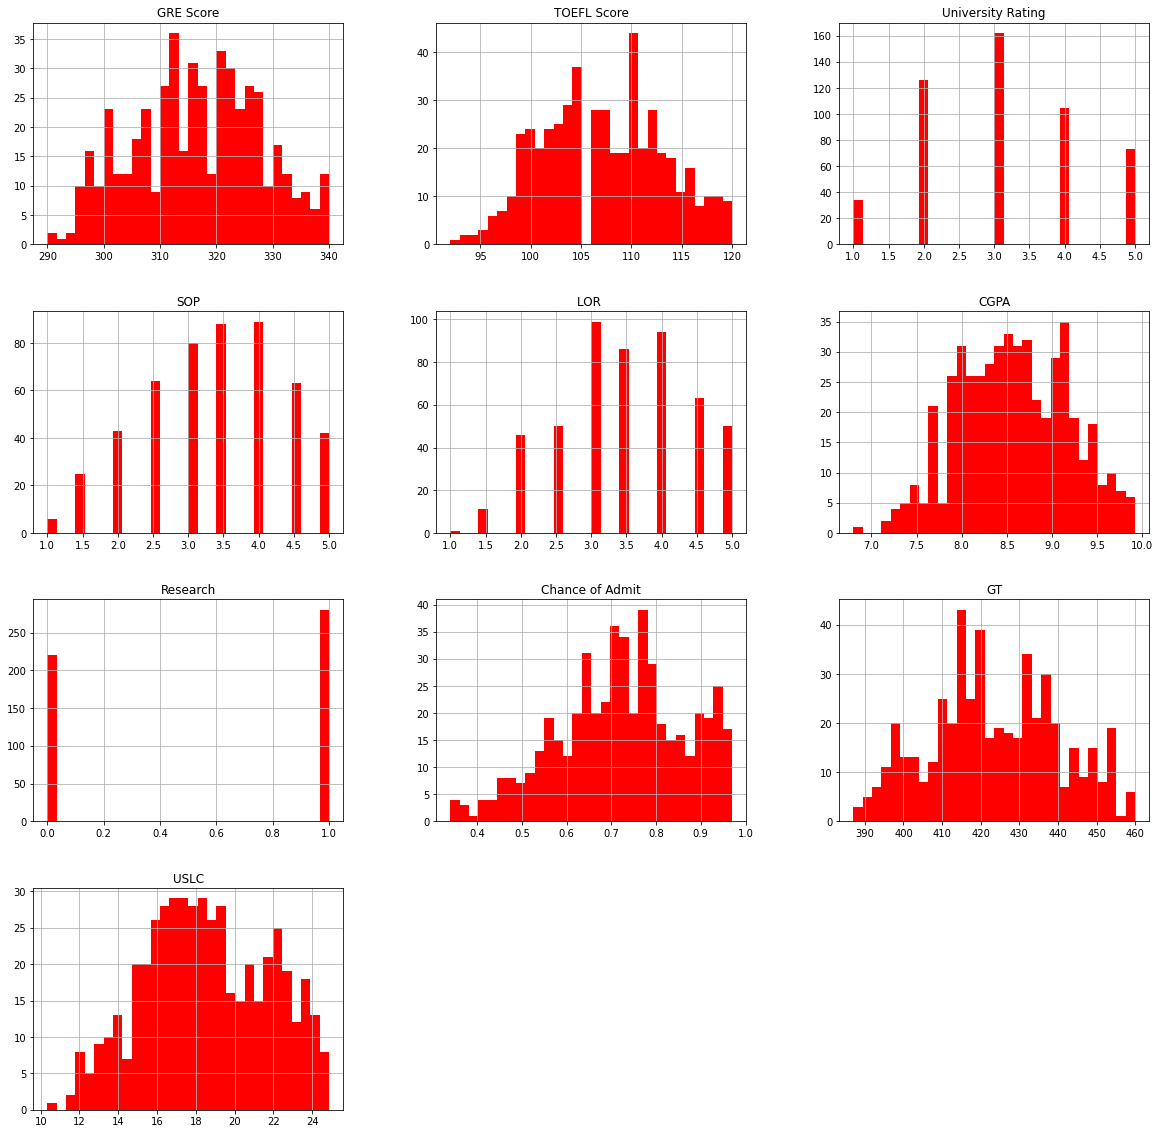

In [12]:
admission_df.hist(bins = 30, figsize = (20, 20), color='r')

In [13]:
X = admission_df.drop(columns=['Chance of Admit'])

In [14]:
y = admission_df['Chance of Admit']

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,GT,USLC
0,337,118,4,4.5,4.5,9.65,1,455,22.65
1,324,107,4,4.0,4.5,8.87,1,431,21.37
2,316,104,3,3.0,3.5,8.00,1,420,17.50
3,322,110,3,3.5,2.5,8.67,1,432,17.67
4,314,103,2,2.0,3.0,8.21,0,417,15.21
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,440,22.52
496,337,117,5,5.0,5.0,9.87,1,454,24.87
497,330,120,5,4.5,5.0,9.56,1,450,24.06
498,312,103,4,4.0,5.0,8.43,0,415,21.43


In [16]:
X.shape

(500, 9)

In [17]:
y.shape

(500,)

In [18]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=145529)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score,r2_score

In [21]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [22]:
accuracy_LinearRegression = linear_regression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8310348250569262

In [23]:
y_pred = linear_regression_model.predict(X_test)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.04233729800518784

In [25]:
acc_lin=r2_score(y_pred, y_test)
acc_lin

0.7928829664729877

In [26]:
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor(random_state=100)
decisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=100)

In [27]:
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_decisionTree

0.6323472832109

In [28]:
y_pred_dt = decisionTree_model.predict(X_test)
acc_dt=r2_score(y_pred, y_pred_dt)
acc_dt

0.7843840776640623

In [29]:
mean_absolute_error(y_test,y_pred_dt)

0.063

In [30]:
from sklearn.ensemble import RandomForestRegressor
randomForest_model = RandomForestRegressor(random_state=100)
randomForest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [31]:
accuracy_randomforest = randomForest_model.score(X_test, y_test)
accuracy_randomforest

0.7881684629827225

In [32]:
y_pred_rf = randomForest_model.predict(X_test)
acc_rf=r2_score(y_pred, y_pred_rf)
acc_rf

0.9517811883490243

In [33]:
mean_absolute_error(y_test,y_pred_rf)

0.04580000000000001

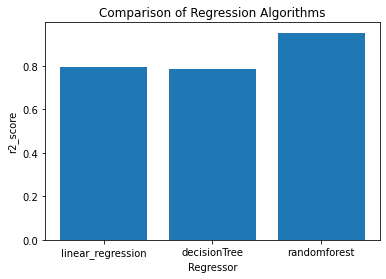

In [34]:
y = np.array([acc_lin,acc_dt,acc_rf])
x = ["linear_regression","decisionTree","randomforest"]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()

In [35]:
x2=[[340,120,5,5,5,10,1,460,25]]
#x2=[[330,118,4.5,4,5,9,1,448,22.5]]
y2=randomForest_model.predict(x2)
y2

C:\Users\thapp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.9668])

In [36]:
import pickle

In [37]:
pickle.dump(randomForest_model, open('randomForest_model.pkl', 'wb'))

In [38]:
model = pickle.load(open('randomForest_model.pkl', 'rb'))